In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bike_sharing = fetch_ucirepo(id=275)

# data (as pandas dataframes)
X = bike_sharing.data.features
y = bike_sharing.data.targets

# metadata
print('\n ---------- Bike sharing metadata ----------')
print(bike_sharing.metadata)

# variable information

print('\n ---------- Bike sharing variables ----------')
print(bike_sharing.variables)





 ---------- Bike sharing metadata ----------
{'uci_id': 275, 'name': 'Bike Sharing', 'repository_url': 'https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/275/data.csv', 'abstract': 'This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.', 'area': 'Social Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 17389, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['cnt'], 'index_col': ['instant'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5W894', 'creators': ['Hadi Fanaee-T'], 'intro_paper': {'ID': 422, 'type': 'NATIVE', 'title': 'Event labeling combining ensemble detectors and background knowledge', 'authors': 

In [ ]:
import pandas as pd

# URL for the day.csv dataset
day_csv_url = 'https://archive.ics.uci.edu/static/public/275/day.csv'

# Load the daily aggregated dataset
daily_df = pd.read_csv(day_csv_url)

# Display the first few rows to confirm it's the correct dataset
print("First 5 rows of the daily dataset:")
display(daily_df.head())

# Update X and y for the daily dataset
X = daily_df.drop(columns=['instant', 'dteday', 'casual', 'registered', 'cnt'])
y = daily_df[['cnt']]

print('\nFeatures (X) shape:', X.shape)
print('Target (y) shape:', y.shape)
print('\nFeatures (X) columns:', X.columns.tolist())

HTTPError: HTTP Error 404: Not Found

Now that `X` and `y` are correctly set up using the daily dataset, let's re-run the visualizations.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y for easier visualization
df_combined_daily = pd.concat([X, y], axis=1)

# Ensure 'dteday' is a datetime object in the combined dataframe for plotting
df_combined_daily['dteday'] = pd.to_datetime(daily_df['dteday'])

print('\nCombined daily dataframe info:')
df_combined_daily.info()

NameError: name 'daily_df' is not defined

### Distribution of Total Daily Bike Rentals (`cnt`)

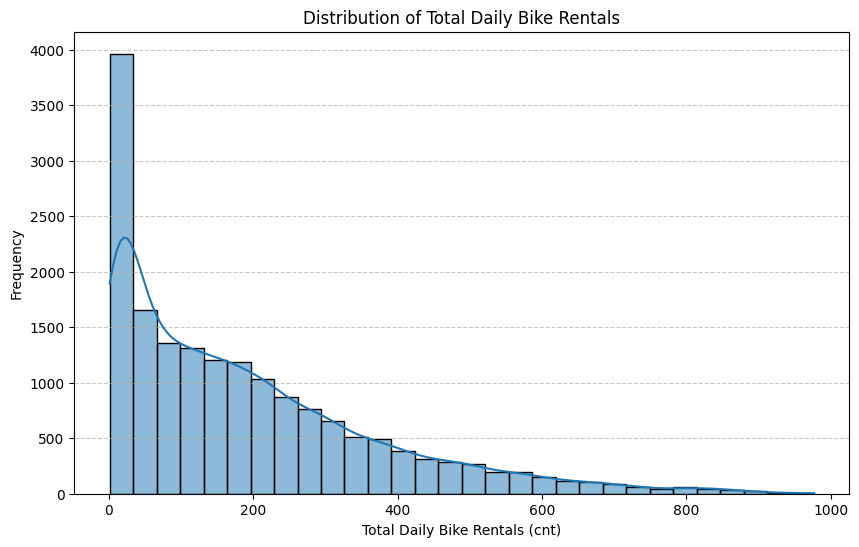

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_combined_daily['cnt'], kde=True, bins=30)
plt.title('Distribution of Total Daily Bike Rentals')
plt.xlabel('Total Daily Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Total Daily Bike Rentals Over Time

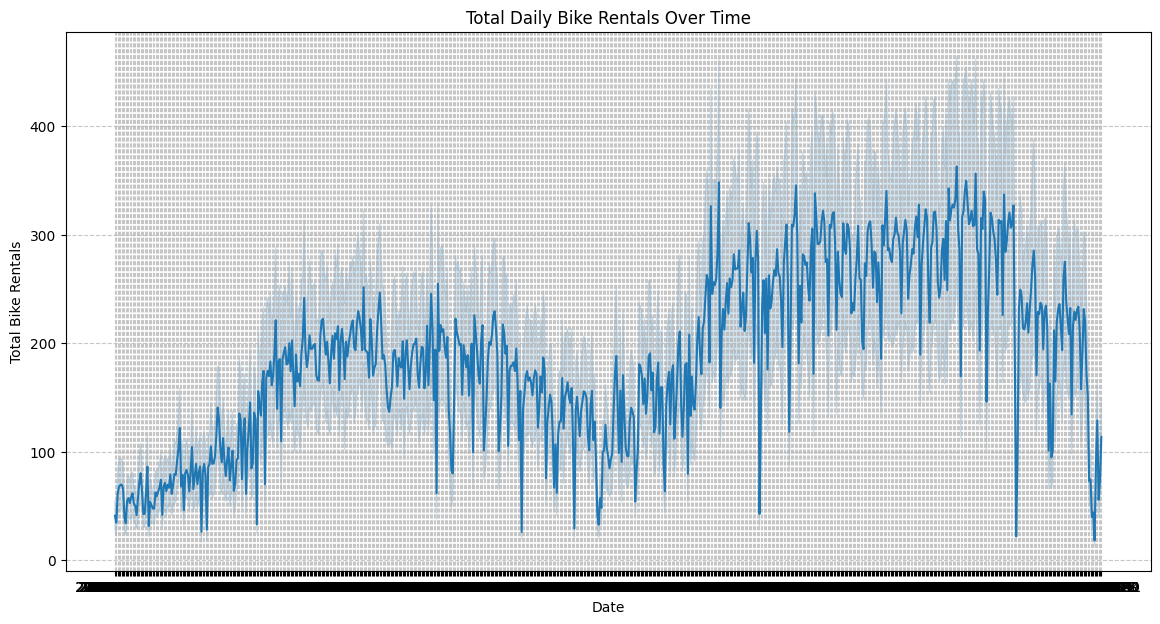

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='dteday', y='cnt', data=df_combined_daily)
plt.title('Total Daily Bike Rentals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Bike Rentals')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Average Daily Bike Rentals by Season

/tmp/ipython-input-3812542276.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='cnt', data=df_combined_daily, palette='coolwarm')


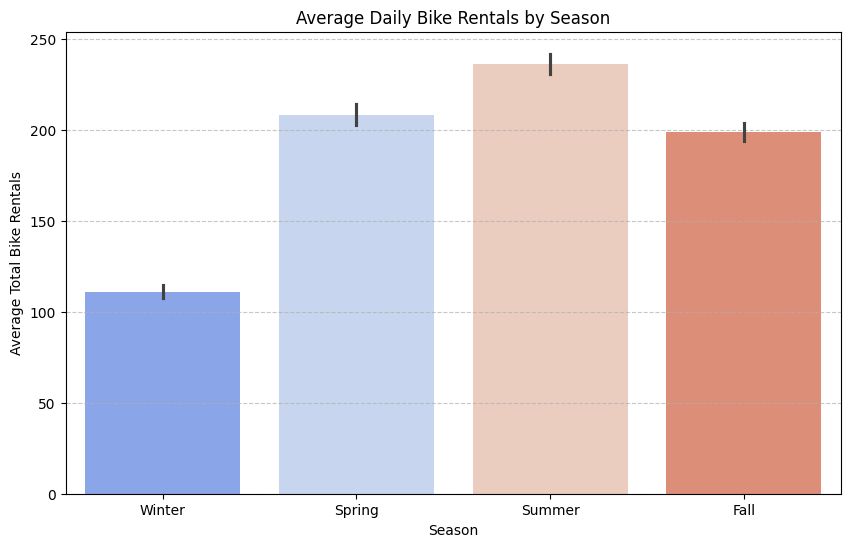

In [ ]:
# Map season numbers to names for better readability
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df_combined_daily['season_name'] = df_combined_daily['season'].map(season_names)

plt.figure(figsize=(10, 6))
sns.barplot(x='season_name', y='cnt', data=df_combined_daily, palette='coolwarm')
plt.title('Average Daily Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Bike Rentals')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()